<a href="https://colab.research.google.com/github/Mostafa3zazi/LeNet-5-network-MNIST-digits/blob/main/LeNet_5_MNIST_digits_DL_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Started (Importing packages & Loading the data)


## Import packages

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import tensorflow as tf
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_val_score,GridSearchCV,KFold,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,precision_score,recall_score,f1_score,precision_recall_curve
sns.set()
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.svm import SVC
from time import time
import datetime
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from PIL import Image

In [ ]:
import keras
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D,\
 Flatten, BatchNormalization, SpatialDropout2D
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, RMSprop


In [ ]:
import tensorboard

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
# some seeting for pandas and hvplot

pd.options.display.max_columns = 100
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100
np.set_printoptions(threshold=2000)

## Loading data

In [ ]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


# Data visualization

In [ ]:
# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')


LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

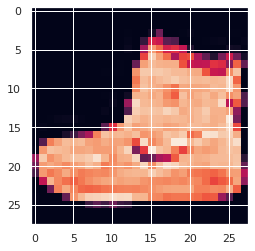

In [ ]:
# Visualize the image
plt.imshow(training_images[index])

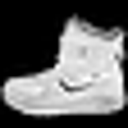

In [ ]:
Image.fromarray(training_images[index]).resize((128, 128))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


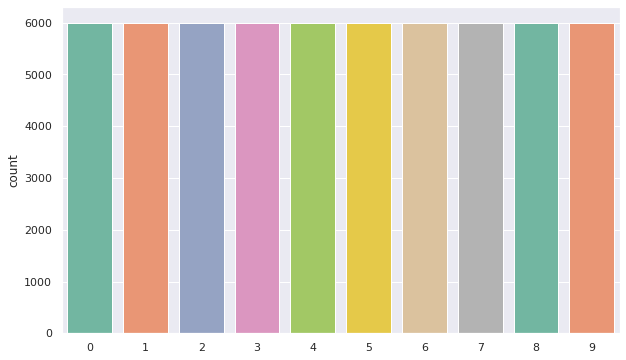

In [ ]:
# plot a figure for units_sold data counting after cleaning it

plt.figure(figsize=(10, 6))
ax = sns.countplot(training_labels,
              palette = "Set2")

# ax.set_xlabel('labels')
plt.show()

##Draw some of the images

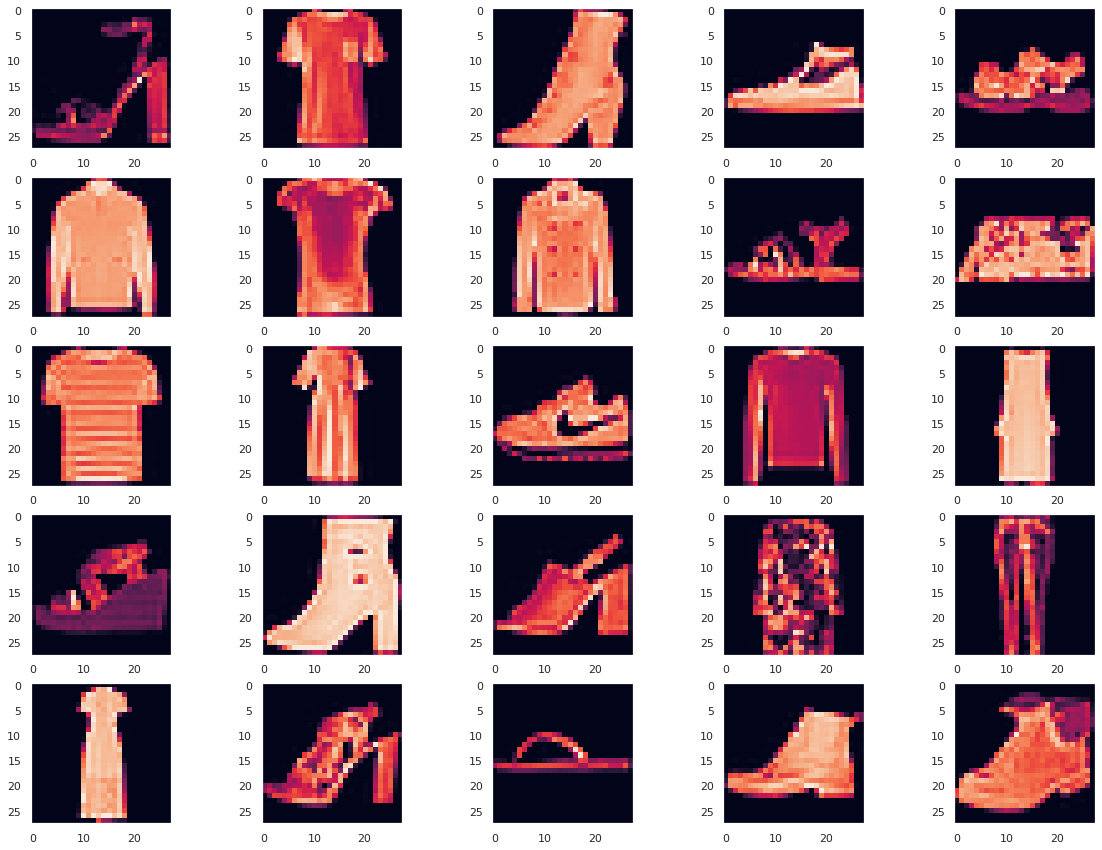

In [ ]:
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import load_img
plt.figure(figsize=(20,15))

for i in range(25):
    j=np.random.choice(range(len(training_images)))
    plt.subplot(5,5,i+1)
    img=training_images[j]
    plt.grid(b=None)
    plt.imshow(img)

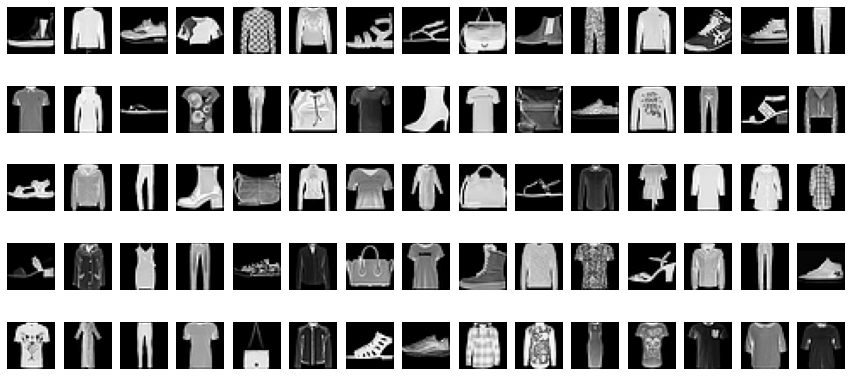

In [ ]:
rows = 5
cols = 15
fig = plt.figure(figsize=(15,7))

for i in range(1, rows*cols+1):
    j=np.random.choice(range(len(training_images)))
    fig.add_subplot(rows, cols, i)
    img=training_images[j]
    plt.imshow(np.squeeze(img), cmap='gray')
    plt.axis(False)
    fig.add_subplot


# Data Preprocessing


## check missing values

In [ ]:
pd.DataFrame(training_labels).isna().sum().sum() # no missing data

0

In [ ]:
pd.DataFrame(test_labels).isna().sum().sum()

0

## Normalization

In [ ]:
# Normalize the pixel values of the train and test images
training_images = training_images / 255.0
test_images = test_images / 255.0

## Encoding the data

In [ ]:
training_labels_encoded = tf.keras.utils.to_categorical(training_labels, num_classes = 10)
test_labels_encoded = tf.keras.utils.to_categorical(test_labels, num_classes = 10)

## Reshaping

In [ ]:
training_images = training_images.reshape(-1,28,28,1)
test_images= test_images.reshape(-1,28,28,1)

In [ ]:
# Print the dimensionality of the data
print('The dimension of the train data:')
print(training_images.shape)
print('\nThe dimension of the train labels:')
print(training_labels.shape)

print('\n\nThe dimension of the validation data:')
print(test_images.shape)
print('\nThe dimension of the validation labels:')
print(test_labels.shape)

The dimension of the train data:
(60000, 28, 28, 1)

The dimension of the train labels:
(60000,)


The dimension of the validation data:
(10000, 28, 28, 1)

The dimension of the validation labels:
(10000,)


# Building Learning Model

## LeNet-5


In [ ]:
rm -rf ./logs/ # remove previous log after each run

In [ ]:
# Create function returning a compiled network
def create_network():
  model = Sequential()
  model.add(Conv2D(6, (5, 5),padding='same', activation='relu',kernel_initializer='he_uniform', input_shape=(training_images[0].shape)))
  model.add(MaxPooling2D(pool_size=(2, 2))) 

  model.add(Conv2D(32, (5, 5), kernel_initializer='he_uniform', activation='relu'))
  model.add(Dropout(0.5))
  model.add(MaxPooling2D(pool_size=(2, 2))) 

  model.add(Conv2D(120, (5, 5), kernel_initializer='he_uniform', activation='relu'))
  model.add(Flatten())
  model.add(Dense(84, activation='relu'))

  model.add(Dense(10, activation='softmax'))
  adam = Adam()
  model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

  return model

In [ ]:
model = create_network()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 32)        4832      
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 120)        

In [ ]:
hist = model.fit(
    training_images, 
    training_labels_encoded, 
    validation_data = (test_images, test_labels_encoded),
    epochs=60,
    batch_size=128,
    callbacks=[
        tensorboard_callback,
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5 )
    ],
    verbose=1)


Epoch 1/60
469/469 [==============================] - 35s 74ms/step - loss: 0.5555 - accuracy: 0.7972 - val_loss: 0.4449 - val_accuracy: 0.8557
Epoch 2/60
469/469 [==============================] - 35s 74ms/step - loss: 0.3912 - accuracy: 0.8571 - val_loss: 0.3958 - val_accuracy: 0.8654
Epoch 3/60
469/469 [==============================] - 34s 73ms/step - loss: 0.3469 - accuracy: 0.8727 - val_loss: 0.3759 - val_accuracy: 0.8744
Epoch 4/60
469/469 [==============================] - 34s 73ms/step - loss: 0.3198 - accuracy: 0.8816 - val_loss: 0.3414 - val_accuracy: 0.8846
Epoch 5/60
469/469 [==============================] - 35s 75ms/step - loss: 0.3026 - accuracy: 0.8887 - val_loss: 0.3379 - val_accuracy: 0.8873
Epoch 6/60
469/469 [==============================] - 35s 74ms/step - loss: 0.2856 - accuracy: 0.8932 - val_loss: 0.3085 - val_accuracy: 0.8936
Epoch 7/60
469/469 [==============================] - 34s 72ms/step - loss: 0.2764 - accuracy: 0.8958 - val_loss: 0.3041 - val_accuracy:

In [ ]:
all_images = np.concatenate((training_images, test_images), axis=0)
all_labels = np.concatenate((training_labels, test_labels), axis=0)
all_labels = tf.keras.utils.to_categorical(all_labels, num_classes = 10)

In [ ]:
!pip install scikeras tensorflow

In [ ]:
# Wrap Keras model so it can be used by scikit-learn
from scikeras.wrappers import KerasClassifier
neural_network = KerasClassifier(model=create_network, 
                                 epochs=10, 
                                 batch_size=64, 
                                 verbose=0)

In [ ]:
%%time
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(neural_network, all_images, all_labels, scoring='accuracy', cv=5)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
scores

Accuracy: 0.909 (0.001)
CPU times: user 47min 35s, sys: 1min 17s, total: 48min 52s
Wall time: 26min 15s


In [ ]:
val_acc = hist.history['val_accuracy']
acc = hist.history['accuracy']
val_loss = hist.history['val_loss']
loss = hist.history['loss']


Value Accuracy |  90.88 %


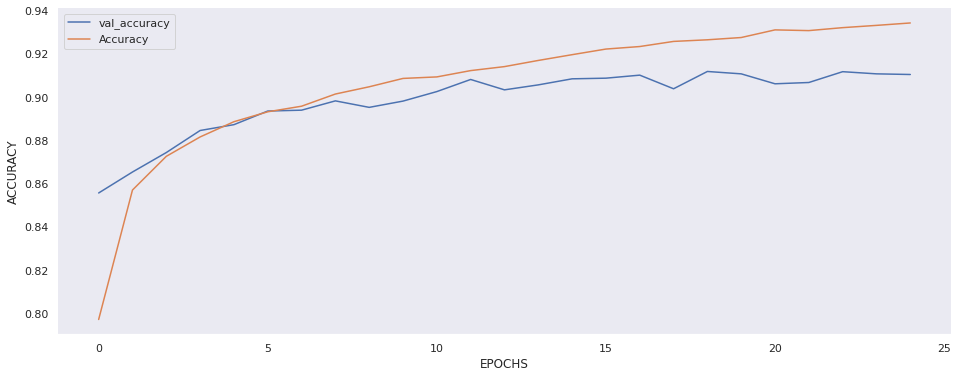

In [ ]:
print("\nValue Accuracy | ",round(np.mean(scores)*100,2),'%')
fig = plt.figure(figsize=(16,6))
plt.plot(np.arange(len(val_acc)),val_acc,label='val_accuracy')
plt.plot(np.arange(len(acc)),acc,label='Accuracy')
plt.xlabel("EPOCHS")
plt.ylabel('ACCURACY')
plt.legend()
plt.grid()
sns.despine(left=True)
plt.show()

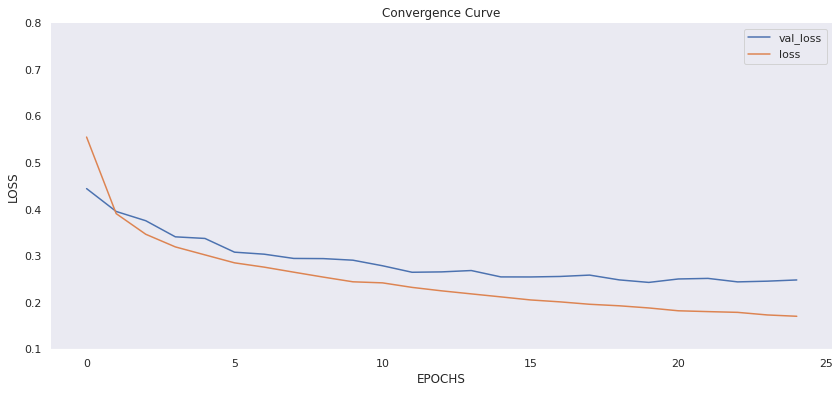

In [ ]:
fig = plt.figure(figsize=(14,6))
plt.plot(np.arange(len(val_loss)),val_loss,label='val_loss')
plt.plot(np.arange(len(loss)),loss,label='loss')
plt.ylim(0.1,0.8)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.title('Convergence Curve')
plt.legend()
plt.grid()
sns.despine(left=True)
plt.show()

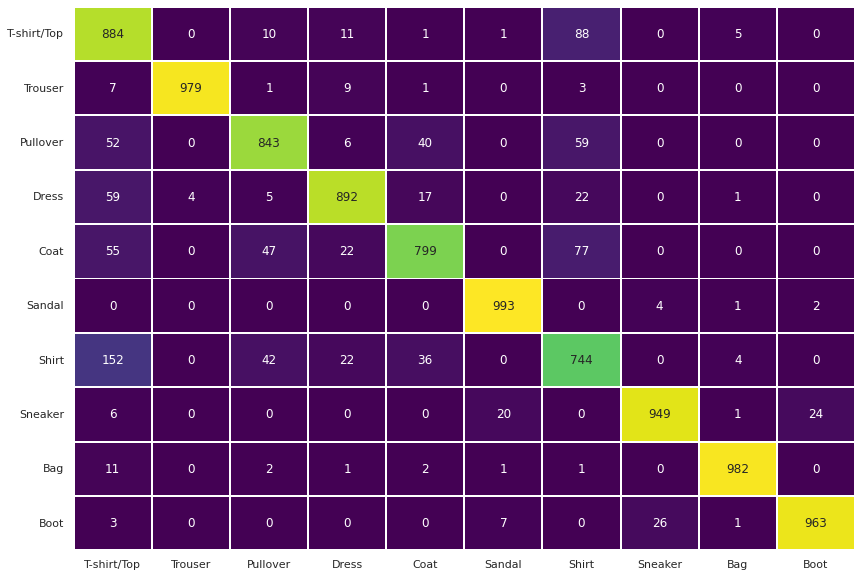

In [ ]:
cloth_cats = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',  
                              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot'] 
                              
pred = model.predict(test_images, batch_size=250)
prd =[]
for i in range(len(pred)):
    prd.append(np.argmax(pred.round()[i]))
con = pd.DataFrame(confusion_matrix(test_labels, prd), index=cloth_cats, columns=cloth_cats)


#print('\nConfusion Matrix Graph--->')
fig = plt.figure(figsize=(14,10))
g = sns.heatmap(con, annot=True, cmap='viridis', linewidths=1, cbar=False, fmt='.5g')
g.set_yticklabels(g.get_yticklabels(), rotation=0)
plt.show()


###Modifying hyperparameters (scikeras)

In [ ]:
# Create function returning a compiled network
def lenet5_network(activation='relu',
                   kernel_initializer='he_uniform',
                   kernel_size = (5,5),
                   optimizer = 'Adam',
                   lr = 0.001
                   ):
  model = Sequential()
  model.add(Conv2D(6, kernel_size ,padding='same', activation = activation, kernel_initializer=kernel_initializer, input_shape=(training_images[0].shape)))
  model.add(MaxPooling2D(pool_size=(2, 2))) 

  model.add(Conv2D(32, kernel_size , kernel_initializer=kernel_initializer, activation = activation))
  model.add(Dropout(0.5))
  model.add(MaxPooling2D(pool_size=(2, 2))) 

  model.add(Conv2D(120, kernel_size , kernel_initializer=kernel_initializer, activation = activation))
  model.add(Flatten())
  model.add(Dense(84, activation = activation))

  model.add(Dense(10, activation='softmax'))
  
  optimizers = {'Adagrad' : Adagrad(learning_rate= lr),
                'Adadelta' : Adadelta(learning_rate= lr),
                'RMSprop' : RMSprop(learning_rate= lr),
                'Adam': Adam(learning_rate= lr)
                }

  model.compile(loss='categorical_crossentropy', optimizer= optimizers[optimizer], metrics=['accuracy'])

  return model

In [ ]:
# Wrap Keras model so it can be used by scikit-learn
from scikeras.wrappers import KerasClassifier
clf_lenet = KerasClassifier(model = lenet5_network,
                            epochs=40,
                            batch_size=64,
                            activation='relu',
                            kernel_initializer='he_uniform',
                            kernel_size = (5,5),
                            optimizer = Adam(),
                            verbose=1,
                            callbacks=[tensorboard_callback,
                                       tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5 )]
                            )
clf_lenet

KerasClassifier(
	model=<function lenet5_network at 0x7f9caea32950>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=<keras.optimizer_v2.adam.Adam object at 0x7f9cb0ec3e50>
	loss=None
	metrics=None
	batch_size=64
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.TensorBoard object at 0x7f9cb237da50>, <keras.callbacks.EarlyStopping object at 0x7f9cb0ec33d0>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=40
	activation=relu
	kernel_initializer=he_uniform
	kernel_size=(5, 5)
	class_weight=None
)

In [ ]:
activation = ['tanh' , 'relue']
kernel_initializer = ['he_uniform','he_normal','glorot_normal','glorot_uniform']
grid_params = dict(activation = activation,
                   kernel_initializer = kernel_initializer)
grid = GridSearchCV(clf_lenet, param_grid = grid_params, cv=5, verbose = 10, n_jobs = -1)

In [ ]:
grid_params

{'activation': ['tanh', 'relue'],
 'kernel_initializer': ['he_uniform',
  'he_normal',
  'glorot_normal',
  'glorot_uniform']}

In [ ]:
grid.estimator.get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'activation', 'kernel_initializer', 'kernel_size', 'class_weight'])

In [ ]:
grid_result = grid.fit(training_images, training_labels_encoded)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


###Modifying hyperparameters (keras tuner)
First we define the model used for tunning

we will tune the following hyperparameters:
* activation function
* weight initialization
* kernel size
* number of filters per layer
* optimizer
* learning rate
* dropout
* batch normalization

keras-tuner will be used.

the tuning operation will go as follows:
1. define the build function for tuner which contains the different values for the hyperparameter to be tuned.
2. build the tuner
3. start the search
4. show results (summary) which will be ordered by the validation accuracy.
5. upload logs to tensorboard

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 133 kB 5.4 MB/s 


In [ ]:
from keras.layers import LeakyReLU
import keras_tuner as kt

In [ ]:
# Create function returning a compiled network
def lenet5_for_kera_tuner(activation='relu',
                   kernel_initializer='he_uniform',
                   kernel_size = (5,5),
                   conv1_filters = 6,
                   conv2_filters = 32,
                   conv3_filters = 120,
                   optimizer = 'Adam',
                   lr = 0.001,
                   drop_out = False,
                   drop_out_rate = 0.2,
                   batch_norm = False
                   ):
  
  if activation == 'LeakyReLU':
    activation = LeakyReLU(alpha = 0.1)

  model = Sequential()
  model.add(Conv2D(conv1_filters, kernel_size ,padding='same', activation = activation, kernel_initializer=kernel_initializer, input_shape=(training_images[0].shape)))
  if drop_out:
    model.add(SpatialDropout2D(drop_out_rate))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  if batch_norm:
    model.add(BatchNormalization())
  model.add(Conv2D(conv2_filters, kernel_size , kernel_initializer=kernel_initializer, activation = activation))
  if drop_out:
    model.add(SpatialDropout2D(drop_out_rate))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  if batch_norm:
    model.add(BatchNormalization())
  model.add(Conv2D(conv3_filters, kernel_size , kernel_initializer=kernel_initializer, activation = activation))
  if drop_out:
    model.add(SpatialDropout2D(drop_out_rate))
  model.add(Flatten())
  
  if batch_norm:
    model.add(BatchNormalization())
  model.add(Dense(84, activation = activation))
  if batch_norm:
    model.add(BatchNormalization())
  model.add(Dense(10, activation='softmax'))

  optimizers = {'Adagrad' : Adagrad(learning_rate= lr),
                'Adadelta' : Adadelta(learning_rate= lr),
                'RMSprop' : RMSprop(learning_rate= lr),
                'Adam': Adam(learning_rate= lr)
                }

  model.compile(loss='categorical_crossentropy', optimizer= optimizers[optimizer], metrics=['accuracy'])

  return model

#### Activation and weight initialization

In [ ]:
rm -rf ./logs/ # remove previous log after each run

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
def build_model_activation_initalizer(hp):
  activation = hp.Choice("activation", ["relu", "tanh", 'LeakyReLU'])
  kernel_initializer = hp.Choice("kernel_initializer",['he_uniform','he_normal','glorot_normal','glorot_uniform'])
  model = lenet5_for_kera_tuner(activation = activation, kernel_initializer = kernel_initializer)
  return model

build_model_activation_initalizer(kt.HyperParameters())

In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_model_activation_initalizer,
    objective="val_accuracy",
    max_trials=100,
    executions_per_trial=1,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'LeakyReLU'], 'ordered': False}
kernel_initializer (Choice)
{'default': 'he_uniform', 'conditions': [], 'values': ['he_uniform', 'he_normal', 'glorot_normal', 'glorot_uniform'], 'ordered': False}


In [ ]:
tuner.search(
    training_images,
    training_labels_encoded,
    validation_split=0.2,
    epochs=40,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
               tensorboard_callback],
)

Trial 12 Complete [00h 01m 56s]
val_accuracy: 0.8686666488647461

Best val_accuracy So Far: 0.9157500267028809
Total elapsed time: 00h 33m 52s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(12)

Results summary
Results in my_dir/helloworld
Showing 12 best trials
Trial summary
Hyperparameters:
activation: relu
kernel_initializer: glorot_uniform
Score: 0.9157500267028809
Trial summary
Hyperparameters:
activation: relu
kernel_initializer: glorot_normal
Score: 0.9154166579246521
Trial summary
Hyperparameters:
activation: relu
kernel_initializer: he_uniform
Score: 0.9130833148956299
Trial summary
Hyperparameters:
activation: relu
kernel_initializer: he_normal
Score: 0.9122499823570251
Trial summary
Hyperparameters:
activation: LeakyReLU
kernel_initializer: glorot_normal
Score: 0.9118333458900452
Trial summary
Hyperparameters:
activation: LeakyReLU
kernel_initializer: glorot_uniform
Score: 0.9114999771118164
Trial summary
Hyperparameters:
activation: LeakyReLU
kernel_initializer: he_uniform
Score: 0.9078333377838135
Trial summary
Hyperparameters:
activation: LeakyReLU
kernel_initializer: he_normal
Score: 0.902999997138977
Trial summary
Hyperparameters:
activation: tanh
kernel_initia

In [ ]:
# !rm -rf 'logs/fit/20220405-034746/07'

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit/

In [ ]:
!tensorboard dev upload \
  --logdir logs/fit \
  --name "activation and weight initialization" \
  --description 'choosing form: \
"activation": ["relu", "tanh", "LeakyReLU"] \
"kernel_initializer" : ["he_uniform","he_normal","glorot_normal","glorot_uniform"] \
the best is activation: relu , kernel_initializer: glorot_uniform'\
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/eTQt6aO0QEmwbSak2WHreA/

[2022-04-05T06:49:23] Started scanning logdir.
[2022-04-05T06:49:35] Total uploaded: 1158 scalars, 1954 tensors (1.4 MB), 12 binary objects (627.3 kB)
[2022-04-05T06:49:35] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/eTQt6aO0QEmwbSak2WHreA/


In [ ]:
!tensorboard dev list

https://tensorboard.dev/experiment/eTQt6aO0QEmwbSak2WHreA/
	Name                 activation and weight initialization
	Description          choosing form: "activation": ["relu", "tanh", "LeakyReLU"] "kernel_initializer" : ["he_uniform","he_normal","glorot_normal","glorot_uniform"] the best is activation: relu , kernel_initializer: glorot_uniform
	Id                   eTQt6aO0QEmwbSak2WHreA
	Created              2022-04-05 06:49:23 (5 minutes ago)
	Updated              2022-04-05 06:49:35 (5 minutes ago)
	Runs                 36
	Tags                 17
	Scalars              1158
	Tensor bytes         1575014
	Binary object bytes  644364
Total: 1 experiment(s)


In [ ]:
# !tensorboard dev delete --experiment_id YOUR_EXPERIMENT_ID_HERE

#### kernel size

In [ ]:
rm -rf ./logs/ # remove previous log after each run

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
def build_model_kernelSize(hp):
  kernel_size = hp.Choice("kernel_size", [3, 5])
  model = lenet5_for_kera_tuner(activation = 'relu',
                                kernel_initializer = 'glorot_uniform',
                                kernel_size = kernel_size)
  return model

build_model_kernelSize(kt.HyperParameters())

In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_model_kernelSize,
    objective="val_accuracy",
    max_trials=100,
    executions_per_trial=1,
    overwrite=True,
    directory="my_dir",
    project_name="kernel_size",
)

In [ ]:
tuner.search(
    training_images,
    training_labels_encoded,
    validation_split=0.2,
    epochs=40,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
               tensorboard_callback],
)

Trial 2 Complete [00h 04m 21s]
val_accuracy: 0.9127500057220459

Best val_accuracy So Far: 0.9181666374206543
Total elapsed time: 00h 08m 05s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/kernel_size
Showing 10 best trials
Trial summary
Hyperparameters:
kernel_size: 5
Score: 0.9181666374206543
Trial summary
Hyperparameters:
kernel_size: 3
Score: 0.9127500057220459


In [ ]:
!tensorboard dev upload \
  --logdir logs/fit \
  --name "kernel_size" \
  --description 'the best is kernel_size: 5'\
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/WDGVyUmfQGWGROPZu3niDQ/

[2022-04-05T07:27:16] Started scanning logdir.
[2022-04-05T07:27:17] Total uploaded: 276 scalars, 464 tensors (330.2 kB), 2 binary objects (104.1 kB)
[2022-04-05T07:27:17] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/WDGVyUmfQGWGROPZu3niDQ/


#### batch size

In [ ]:
!rm -rf ./logs/ # remove previous log after each run

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
def build_model_batchSize(hp):
  # kernel_size = hp.Choice("kernel_size", [3, 5])
  model = lenet5_for_kera_tuner(activation = 'relu',
                                kernel_initializer = 'glorot_uniform',
                                kernel_size = 5)
  return model

build_model_batchSize(kt.HyperParameters())

In [ ]:
class MyTuner(kt.RandomSearch):
  def run_trial(self, trial, *args, **kwargs):
    # You can add additional HyperParameters for preprocessing and custom training loops
    # via overriding `run_trial`
    kwargs['batch_size'] = trial.hyperparameters.Int('batch_size', 64, 256, step=32)
    # kwargs['epochs'] = trial.hyperparameters.Int('epochs', 10, 30)
    return super(MyTuner, self).run_trial(trial, *args, **kwargs)

In [ ]:
tuner = MyTuner(
    hypermodel=build_model_batchSize,
    objective="val_accuracy",
    max_trials=100,
    executions_per_trial=1,
    overwrite=True,
    directory="my_dir",
    project_name="batch_size",
)

In [ ]:
tuner.search(
    training_images,
    training_labels_encoded,
    validation_split=0.2,
    # batch_size = hp.Choice("batch_size", [16, 32, 64, 128, 256]),
    epochs=40,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
               tensorboard_callback],
)

Trial 8 Complete [00h 16m 24s]
val_accuracy: 0.9164999723434448

Best val_accuracy So Far: 0.918666660785675
Total elapsed time: 02h 00m 42s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/batch_size
Showing 10 best trials
Trial summary
Hyperparameters:
batch_size: 160
Score: 0.918666660785675
Trial summary
Hyperparameters:
batch_size: 64
Score: 0.9179166555404663
Trial summary
Hyperparameters:
batch_size: 64
Score: 0.9167500138282776
Trial summary
Hyperparameters:
batch_size: 96
Score: 0.9167500138282776
Trial summary
Hyperparameters:
batch_size: 128
Score: 0.9167500138282776
Trial summary
Hyperparameters:
batch_size: 224
Score: 0.9166666865348816
Trial summary
Hyperparameters:
batch_size: 256
Score: 0.9164999723434448
Trial summary
Hyperparameters:
batch_size: 192
Score: 0.9164166450500488


In [ ]:
!tensorboard dev upload \
  --logdir logs/fit \
  --name "batch_size" \
  --description ''\
  --one_shot

2022-04-06 00:48:38.309976: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs/fit

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoa

#### number of filters

In [ ]:
rm -rf ./logs/ # remove previous log after each run

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
def build_model_filters(hp):
  conv1_filters = 2 ** hp.Int('conv1_filters', min_value = 2, max_value = 8, step=1)
  conv2_filters = 2 ** hp.Int('conv2_filters', min_value = 2, max_value = 8, step=1)
  conv3_filters = 2 ** hp.Int('conv3_filters', min_value = 2, max_value = 8, step=1)
  model = lenet5_for_kera_tuner(activation = 'relu',
                                kernel_initializer = 'glorot_uniform',
                                kernel_size = 5,
                                conv1_filters = conv1_filters,
                                conv2_filters = conv2_filters,
                                conv3_filters = conv3_filters)
  return model

build_model_filters(kt.HyperParameters())

In [ ]:
tuner = kt.Hyperband(
    hypermodel=build_model_filters,
    objective="val_accuracy",
    max_epochs=100,
    hyperband_iterations=1,
    overwrite=True,
    directory="my_dir",
    project_name="filters_number",
)

In [ ]:
tuner.search(
    training_images,
    training_labels_encoded,
    validation_split=0.2,
    epochs=40,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
               tensorboard_callback],
)

Trial 161 Complete [00h 00m 41s]
val_accuracy: 0.8886666893959045

Best val_accuracy So Far: 0.9190000295639038
Total elapsed time: 01h 11m 43s

Search: Running Trial #162

Value             |Best Value So Far |Hyperparameter
8                 |7                 |conv1_filters
3                 |7                 |conv2_filters
7                 |5                 |conv3_filters
4                 |100               |tuner/epochs
0                 |34                |tuner/initial_epoch
3                 |4                 |tuner/bracket
0                 |4                 |tuner/round

Epoch 1/4
1490/1500 [============================>.] - ETA: 0s - loss: 0.5318 - accuracy: 0.7978

KeyboardInterrupt: ignored

In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/filters_number
Showing 10 best trials
Trial summary
Hyperparameters:
conv1_filters: 7
conv2_filters: 7
conv3_filters: 5
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0143
Score: 0.9190000295639038
Trial summary
Hyperparameters:
conv1_filters: 6
conv2_filters: 7
conv3_filters: 5
tuner/epochs: 12
tuner/initial_epoch: 4
tuner/bracket: 4
tuner/round: 2
tuner/trial_id: 0116
Score: 0.918749988079071
Trial summary
Hyperparameters:
conv1_filters: 7
conv2_filters: 7
conv3_filters: 5
tuner/epochs: 12
tuner/initial_epoch: 4
tuner/bracket: 4
tuner/round: 2
tuner/trial_id: 0115
Score: 0.9178333282470703
Trial summary
Hyperparameters:
conv1_filters: 5
conv2_filters: 8
conv3_filters: 5
tuner/epochs: 12
tuner/initial_epoch: 4
tuner/bracket: 4
tuner/round: 2
tuner/trial_id: 0104
Score: 0.9169166684150696
Trial summary
Hyperparameters:
conv1_filters: 6
conv2_filters: 7
conv3_filters: 5
tuner/epochs: 100
tuner/initial_epoch: 34

In [ ]:
!tensorboard dev upload \
  --logdir logs/fit \
  --name "filters_number" \
  --description ''\
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs/fit

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=mXtenM1cjuWAbnGT8zJGUuTkc29OYq&prompt=consent&access_type=offline
Ente

#### optimizers and learning rate

In [ ]:
rm -rf ./logs/ # remove previous log after each run

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
def build_model_optimizers(hp):
  optimizer = hp.Choice("optimizer", ['Adagrad','Adadelta','RMSprop','Adam'])
  learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-4])
  model = lenet5_for_kera_tuner(activation = 'relu',
                                kernel_initializer = 'glorot_uniform',
                                kernel_size = 5,
                                conv1_filters =  2**7,
                                conv2_filters = 2**7,
                                conv3_filters = 2**5,
                                optimizer = optimizer,
                                lr =learning_rate)
  return model

build_model_optimizers(kt.HyperParameters())

In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_model_optimizers,
    objective="val_accuracy",
    max_trials=100,
    executions_per_trial=1,
    overwrite=True,
    directory="my_dir",
    project_name="optimizers",
)

In [ ]:
tuner.search(
    training_images,
    training_labels_encoded,
    validation_split=0.2,
    epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
               tensorboard_callback],
)

Trial 10 Complete [00h 03m 22s]
val_accuracy: 0.909500002861023

Best val_accuracy So Far: 0.9164166450500488
Total elapsed time: 00h 26m 12s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/optimizers
Showing 10 best trials
Trial summary
Hyperparameters:
optimizer: Adagrad
learning_rate: 0.1
Score: 0.9164166450500488
Trial summary
Hyperparameters:
optimizer: RMSprop
learning_rate: 0.0001
Score: 0.9148333072662354
Trial summary
Hyperparameters:
optimizer: Adam
learning_rate: 0.0001
Score: 0.9139166474342346
Trial summary
Hyperparameters:
optimizer: Adadelta
learning_rate: 0.1
Score: 0.9125833511352539
Trial summary
Hyperparameters:
optimizer: Adagrad
learning_rate: 0.01
Score: 0.909500002861023
Trial summary
Hyperparameters:
optimizer: Adam
learning_rate: 0.01
Score: 0.8765000104904175
Trial summary
Hyperparameters:
optimizer: Adadelta
learning_rate: 0.01
Score: 0.8560000061988831
Trial summary
Hyperparameters:
optimizer: Adadelta
learning_rate: 0.0001
Score: 0.30508333444595337
Trial summary
Hyperparameters:
optimizer: Adam
learning_rate: 0.1
Score: 0.10266666859388351
Trial summary
Hyperparameters:
optimizer: RMSprop
learning_rate: 0.1
S

from the previous trials Adam with 0.001 learning rate has the heighest validation acc so far with 92%

In [ ]:
!tensorboard dev upload \
  --logdir logs/fit \
  --name "optimizers and learning rate" \
  --description 'the best is Adam(lr = 0.001)'\
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/mNy1Pm4lQQyUmpynu4ZvuA/

[2022-04-06T06:42:48] Started scanning logdir.
[2022-04-06T06:42:59] Total uploaded: 930 scalars, 1570 tensors (1.1 MB), 10 binary objects (543.9 kB)
[2022-04-06T06:42:59] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/mNy1Pm4lQQyUmpynu4ZvuA/


#### dropout

In [ ]:
rm -rf ./logs/ # remove previous log after each run

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
def build_model_optimizers(hp):
  drop_out_rate = hp.Choice("drop_out_rate", [0.2,0.3,0.4,0.5])
  model = lenet5_for_kera_tuner(activation = 'relu',
                                kernel_initializer = 'glorot_uniform',
                                kernel_size = 5,
                                conv1_filters =  2**7,
                                conv2_filters = 2**7,
                                conv3_filters = 2**5,
                                optimizer = 'Adam',
                                lr = 0.001,
                                drop_out = True,
                                drop_out_rate = drop_out_rate)
  return model

build_model_optimizers(kt.HyperParameters())

In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_model_optimizers,
    objective="val_accuracy",
    max_trials=100,
    executions_per_trial=1,
    overwrite=True,
    directory="my_dir",
    project_name="drop_out",
)

In [ ]:
tuner.search(
    training_images,
    training_labels_encoded,
    validation_split=0.2,
    epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
               tensorboard_callback],
)

Trial 4 Complete [00h 10m 23s]
val_accuracy: 0.9211666584014893

Best val_accuracy So Far: 0.9211666584014893
Total elapsed time: 00h 38m 29s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/drop_out
Showing 10 best trials
Trial summary
Hyperparameters:
drop_out_rate: 0.2
Score: 0.9211666584014893
Trial summary
Hyperparameters:
drop_out_rate: 0.3
Score: 0.9173333048820496
Trial summary
Hyperparameters:
drop_out_rate: 0.4
Score: 0.9104999899864197
Trial summary
Hyperparameters:
drop_out_rate: 0.5
Score: 0.8952500224113464


In [ ]:
!tensorboard dev upload \
  --logdir logs/fit \
  --name "drop out" \
  --description 'the best is 0.2'\
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs/fit

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=QbbXqPkqNrtz6dfL894p9Ut8D21ca6&prompt=consent&access_type=offline
Ente

#### batch norm

In [ ]:
rm -rf ./logs/ # remove previous log after each run

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
model = lenet5_for_kera_tuner(activation = 'relu',
                              kernel_initializer = 'glorot_uniform',
                              kernel_size = 5,
                              conv1_filters =  2**7,
                              conv2_filters = 2**7,
                              conv3_filters = 2**5,
                              optimizer = 'Adam',
                              lr = 0.001,
                              drop_out = True,
                              drop_out_rate = 0.2,
                              batch_norm = True)


In [ ]:
hist = model.fit(
    training_images, 
    training_labels_encoded, 
    validation_split = 0.2,
    epochs=60,
    batch_size=32,
    callbacks=[
        tensorboard_callback,
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5 )
    ],
    verbose=1)

Epoch 1/60
1500/1500 [==============================] - 38s 24ms/step - loss: 0.5640 - accuracy: 0.7969 - val_loss: 0.3404 - val_accuracy: 0.8700
Epoch 2/60
1500/1500 [==============================] - 36s 24ms/step - loss: 0.3791 - accuracy: 0.8616 - val_loss: 0.3005 - val_accuracy: 0.8875
Epoch 3/60
1500/1500 [==============================] - 37s 24ms/step - loss: 0.3322 - accuracy: 0.8790 - val_loss: 0.2885 - val_accuracy: 0.8933
Epoch 4/60
1500/1500 [==============================] - 36s 24ms/step - loss: 0.3057 - accuracy: 0.8892 - val_loss: 0.2600 - val_accuracy: 0.9036
Epoch 5/60
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2842 - accuracy: 0.8974 - val_loss: 0.2426 - val_accuracy: 0.9071
Epoch 6/60
1500/1500 [==============================] - 35s 24ms/step - loss: 0.2658 - accuracy: 0.9021 - val_loss: 0.2699 - val_accuracy: 0.8977
Epoch 7/60
1500/1500 [==============================] - 35s 24ms/step - loss: 0.2474 - accuracy: 0.9110 - val_loss: 0.2431 -

loss: 0.1472 - accuracy: 0.9465 - val_loss: 0.2174 - val_accuracy: 0.9243

In [ ]:
!tensorboard dev upload \
  --logdir logs/fit \
  --name "batch normalization" \
  --description 'top val_acc achieved (0.9243)'\
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/7IzsQ5U2R76jjUKar4SarQ/

[2022-04-06T22:59:42] Started scanning logdir.
[2022-04-06T22:59:43] Total uploaded: 132 scalars, 572 tensors (410.6 kB), 1 binary objects (116.9 kB)
[2022-04-06T22:59:43] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/7IzsQ5U2R76jjUKar4SarQ/


### Evaluate the model

In [ ]:
!pip install scikeras tensorflow

In [ ]:
model = lenet5_for_kera_tuner(activation = 'relu',
                              kernel_initializer = 'glorot_uniform',
                              kernel_size = 5,
                              conv1_filters =  2**7,
                              conv2_filters = 2**7,
                              conv3_filters = 2**5,
                              optimizer = 'Adam',
                              lr = 0.001)

In [ ]:
# Create function returning a compiled network
def evaluation_network():
  
  model = Sequential()
  model.add(Conv2D(2**7, (5,5) ,padding='same', activation = 'relu', kernel_initializer='he_uniform', input_shape=(training_images[0].shape)))
  model.add(SpatialDropout2D(0.2))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(BatchNormalization())
  model.add(Conv2D(2**7, (5,5) , kernel_initializer='he_uniform', activation = 'relu'))
  model.add(SpatialDropout2D(0.2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(BatchNormalization())
  model.add(Conv2D(2**5, (5,5) , kernel_initializer='he_uniform', activation = 'relu'))
  model.add(SpatialDropout2D(0.2))
  model.add(Flatten())
  
  model.add(BatchNormalization())
  model.add(Dense(84, activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer= Adam(0.001), metrics=['accuracy'])

  return model

In [ ]:
# Wrap Keras model so it can be used by scikit-learn
from scikeras.wrappers import KerasClassifier
neural_network = KerasClassifier(model=lenet5_for_kera_tuner, 
                                  epochs=20, 
                                  batch_size=32, 
                                  activation = 'relu',
                                  kernel_initializer = 'glorot_uniform',
                                  kernel_size = 5,
                                  conv1_filters =  2**7,
                                  conv2_filters = 2**7,
                                  conv3_filters = 2**5,
                                  optimizer = 'Adam',
                                  lr = 0.001,
                                  drop_out = True,
                                  drop_out_rate = 0.2,
                                  batch_norm = True,
                                )

In [ ]:
neural_network

KerasClassifier(
	model=<function lenet5_for_kera_tuner at 0x7ff430ab1200>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=Adam
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=20
	activation=relu
	kernel_initializer=glorot_uniform
	kernel_size=5
	conv1_filters=128
	conv2_filters=128
	conv3_filters=32
	lr=0.001
	drop_out_rate=0.2
	batch_norm=True
	class_weight=None
)

In [ ]:
cv = KFold(n_splits=5, shuffle=True)
# evaluate model
scores = cross_val_score(neural_network, training_images, training_labels_encoded, scoring='accuracy', cv=cv)


Epoch 1/20
1500/1500 [==============================] - 35s 22ms/step - loss: 0.5433 - accuracy: 0.8062
Epoch 2/20
1500/1500 [==============================] - 34s 22ms/step - loss: 0.3692 - accuracy: 0.8661
Epoch 3/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.3294 - accuracy: 0.8820
Epoch 4/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.3021 - accuracy: 0.8932
Epoch 5/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2774 - accuracy: 0.9009
Epoch 6/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2631 - accuracy: 0.9055
Epoch 7/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2453 - accuracy: 0.9110
Epoch 8/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2332 - accuracy: 0.9167
Epoch 9/20
1500/1500 [==============================] - 32s 22ms/step - loss: 0.2214 - accuracy: 0.9210
Epoch 10/20
1500/1500 [==============================] - 32s 22m

In [ ]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
scores

## AlexNet


In [ ]:
rm -rf ./logs/ # remove previous log after each run

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [ ]:
# Create function returning a compiled network
def create_AlexNetwork():
  #Alexnet model for feature extraction

  model = Sequential()
  model.add(BatchNormalization(input_shape=(training_images[0].shape)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(28, (5, 5),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # model.add(ZeroPadding2D((1, 1)))
  model.add(Conv2D(28, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # model.add(ZeroPadding2D((1, 1)))
  model.add(Conv2D(32, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  # model.add(ZeroPadding2D((1, 1)))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(128))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))

  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))

  model.add(Dense(10))
  model.add(BatchNormalization())
  model.add(Activation('softmax'))

  adam = Adam(learning_rate=0.001)
  model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

  return model

In [ ]:
alexnet = create_AlexNetwork()
alexnet.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_136 (Ba  (None, 28, 28, 1)        4         
 tchNormalization)                                               
                                                                 
 activation_136 (Activation)  (None, 28, 28, 1)        0         
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 14, 14, 1)        0         
 g2D)                                                            
                                                                 
 conv2d_89 (Conv2D)          (None, 14, 14, 28)        728       
                                                                 
 batch_normalization_137 (Ba  (None, 14, 14, 28)       112       
 tchNormalization)                                               
                                                     

In [ ]:
hist = alexnet.fit(
    training_images, 
    training_labels_encoded, 
    validation_data=(test_images, test_labels_encoded),
    epochs=60,
    batch_size=128,
    callbacks=[
        tensorboard_callback
    ],
    verbose=1)


Epoch 1/60
469/469 [==============================] - 33s 67ms/step - loss: 0.8923 - accuracy: 0.7529 - val_loss: 0.6420 - val_accuracy: 0.8169
Epoch 2/60
469/469 [==============================] - 31s 65ms/step - loss: 0.5471 - accuracy: 0.8463 - val_loss: 0.4729 - val_accuracy: 0.8467
Epoch 3/60
469/469 [==============================] - 31s 65ms/step - loss: 0.4607 - accuracy: 0.8619 - val_loss: 0.5076 - val_accuracy: 0.8236
Epoch 4/60
469/469 [==============================] - 31s 65ms/step - loss: 0.4207 - accuracy: 0.8672 - val_loss: 0.4454 - val_accuracy: 0.8417
Epoch 5/60
469/469 [==============================] - 32s 69ms/step - loss: 0.3953 - accuracy: 0.8730 - val_loss: 0.4226 - val_accuracy: 0.8537
Epoch 6/60
469/469 [==============================] - 31s 66ms/step - loss: 0.3660 - accuracy: 0.8812 - val_loss: 0.3974 - val_accuracy: 0.8636
Epoch 7/60
469/469 [==============================] - 31s 66ms/step - loss: 0.3543 - accuracy: 0.8832 - val_loss: 0.3979 - val_accuracy:

In [ ]:
# Wrap Keras model so it can be used by scikit-learn
from scikeras.wrappers import KerasClassifier
alex_network = KerasClassifier(model=create_AlexNetwork, 
                                 epochs=10, 
                                 batch_size=64, 
                                 verbose=0)

In [ ]:
%%time
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(alex_network, all_images, all_labels, scoring='accuracy', cv=cv)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
scores

Accuracy: 0.879 (0.003)
CPU times: user 38min 33s, sys: 1min 54s, total: 40min 27s
Wall time: 22min 38s


In [ ]:
val_acc = hist.history['val_accuracy']
acc = hist.history['accuracy']
val_loss = hist.history['val_loss']
loss = hist.history['loss']


Value Accuracy |  87.94 %


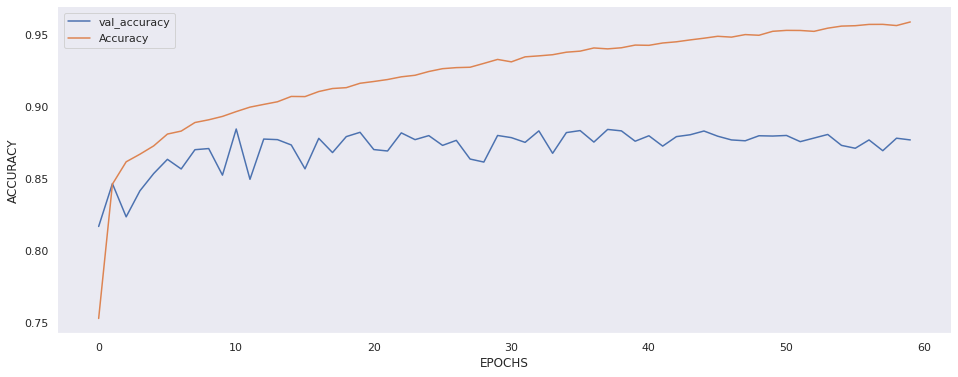

In [ ]:
print("\nValue Accuracy | ",round(np.mean(scores)*100,2),'%')
fig = plt.figure(figsize=(16,6))
plt.plot(np.arange(len(val_acc)),val_acc,label='val_accuracy')
plt.plot(np.arange(len(acc)),acc,label='Accuracy')
plt.xlabel("EPOCHS")
plt.ylabel('ACCURACY')
plt.legend()
plt.grid()
sns.despine(left=True)
plt.show()

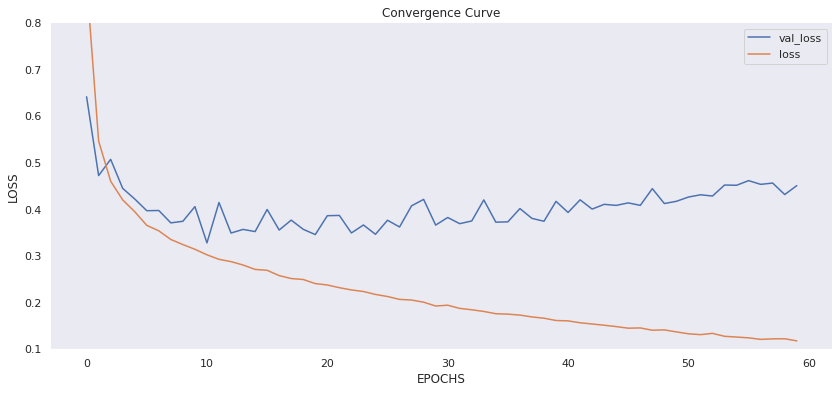

In [ ]:
fig = plt.figure(figsize=(14,6))
plt.plot(np.arange(len(val_loss)),val_loss,label='val_loss')
plt.plot(np.arange(len(loss)),loss,label='loss')
plt.ylim(0.1,0.8)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.title('Convergence Curve')
plt.legend()
plt.grid()
sns.despine(left=True)
plt.show()

# Tensor Board

## LeNet-5 Trial


In [ ]:
%tensorboard --logdir logs # the magic line that will get us the learning graphs , document every run and save screen shot of all the failure

In [ ]:
!tensorboard dev upload --logdir ./logs \
  --name " LeNet-5" \
  --one_shot

2022-04-04 10:39:52.805286: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoaut

## AlexNet Trial



In [ ]:
%tensorboard --logdir logs # the magic line that will get us the learning graphs , document every run and save screen shot of all the failure

In [ ]:
!tensorboard dev upload --logdir ./logs \
  --name "AlexNet" \
  --one_shot

2022-04-04 18:39:29.238357: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/KSOKfyNqRrevuRlpWduGsw/

[2022-04-04T18:39:29] Started scanning logdir.
E0404 18:39:30.855987 139896030754688 uploader.py:1122] Attempted to re-upload existing blob.  Skipping.
E0404 18:39:31.839533 139896030754688 uploader.py:1122] Attempted to re-upload existing blob.  Skipping.
[2022-04-04T18:39:36] Total uploaded: 384 scalars, 2944 tensors (2.1 MB), 1 binary objects (174.7 kB)
Total skipped: 2 binary objects (349.3 kB)
[2022-04-04T18:39:36] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/KSOKfyNqRrevuRlpWduGsw/


## Trials List

In [ ]:
!tensorboard dev list

2022-04-04 18:39:48.484862: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
https://tensorboard.dev/experiment/KSOKfyNqRrevuRlpWduGsw/
	Name                 AlexNet
	Description          [No Description]
	Id                   KSOKfyNqRrevuRlpWduGsw
	Created              2022-04-04 18:39:29 (30 seconds ago)
	Updated              2022-04-04 18:39:36 (23 seconds ago)
	Runs                 2
	Tags                 97
	Scalars              384
	Tensor bytes         2399360
	Binary object bytes  179022
https://tensorboard.dev/experiment/48oSeNPMQg27fOV1qc3gUg/
	Name                 AlexNet
	Description          [No Description]
	Id                   48oSeNPMQg27fOV1qc3gUg
	Created              2022-04-04 16:33:36 (2 hours ago)
	Updated              2022-04-04 16:33:43 (2 hours ago)
	Runs                 2
	Tags                 97
	Scalars              450
	Tensor bytes         2811750
	Binary object bytes  1